In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Importing the dataset.
olympics_df = pd.read_csv('C:/Users/DELL/Desktop/SQL database/athlete_events.csv')
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Data length.
print(olympics_df.shape)

(271116, 15)


In [4]:
# Data domain.
olympics_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
# Unique Players. 
len(olympics_df['ID'].unique())

135571

In [6]:
# Checking null values.
olympics_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
# Checking data types.
olympics_df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [8]:
# replacing null Values with 0 for Age,Weight,Height.

d = olympics_df[['Age','Height','Weight']].fillna(value=0)
d.head()

,Age,Height,Weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
2,24.0,0.0,0.0
3,34.0,0.0,0.0
4,21.0,185.0,82.0


In [9]:
# replacing null values with None for Medal.
medal = olympics_df[['Medal']].fillna(value='None')
medal.head()

,Medal
0,None
1,None
2,None
3,Gold
4,None


In [10]:
new_df = pd.concat([d,olympics_df[['ID', 'Name', 'Sex','Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event']],medal],axis=1)

In [11]:
new_df.head()

,Age,Height,Weight,ID,Name,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,24.0,180.0,80.0,1,A Dijiang,M,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,23.0,170.0,60.0,2,A Lamusi,M,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,24.0,0.0,0.0,3,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,34.0,0.0,0.0,4,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,21.0,185.0,82.0,5,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [12]:
new_df.columns

Index(['Age', 'Height', 'Weight', 'ID', 'Name', 'Sex', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [13]:
cleaned_olympics_df = new_df[[ 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight','Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']]
cleaned_olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [14]:
cleaned_olympics_df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [15]:
# Loading noc regions data for each country.
noc_regions_df = pd.read_csv('C:/Users/DELL/Desktop/SQL database/noc_regions.csv')
len(noc_regions_df['region'].unique())

207

In [16]:
# Inner Joining the two datasets.
joined_df = pd.merge(noc_regions_df[['NOC','region']],cleaned_olympics_df,on='NOC')
joined_df

,NOC,region,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
0,AFG,Afghanistan,502,Ahmad Shah Abouwi,M,0.0,0.0,0.0,Afghanistan,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,None
1,AFG,Afghanistan,1076,Jammal-ud-Din Affendi,M,28.0,0.0,0.0,Afghanistan,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,None
2,AFG,Afghanistan,1101,Mohammad Anwar Afzal,M,0.0,0.0,0.0,Afghanistan,1948 Summer,1948,Summer,London,Football,Football Men's Football,None
3,AFG,Afghanistan,1745,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",None
4,AFG,Afghanistan,4628,Mohammad Daoud Anwary,M,22.0,0.0,0.0,Afghanistan,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270762,ZIM,Zimbabwe,130832,Hillary Wilson,F,15.0,157.0,65.0,Zimbabwe,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 100 metres Butterfly,None
270763,ZIM,Zimbabwe,130832,Hillary Wilson,F,15.0,157.0,65.0,Zimbabwe,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Medley Relay,None
270764,ZIM,Zimbabwe,130880,Peter Arthur Wilson,M,20.0,185.0,80.0,Zimbabwe,1980 Summer,1980,Summer,Moskva,Sailing,Sailing Mixed One Person Dinghy,None
270765,ZIM,Zimbabwe,131478,"Jennifer ""Jenny"" Wood",F,16.0,172.0,64.0,Zimbabwe,1964 Summer,1964,Summer,Tokyo,Swimming,Swimming Women's 100 metres Butterfly,None


In [17]:
olympics_data = joined_df.copy()

In [18]:
len(olympics_data['region'].unique())

206

In [19]:
olympics_data=olympics_data.sort_values(by=['ID'])
olympics_data.head()

,NOC,region,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
43970,CHN,China,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
43971,CHN,China,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
56584,DEN,Denmark,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
56585,DEN,Denmark,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
172323,NED,Netherlands,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None


In [20]:
olympics_data.index = [n for n in range(1,270768)]

In [21]:
olympics_data

,NOC,region,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
1,CHN,China,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,CHN,China,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
3,DEN,Denmark,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
4,DEN,Denmark,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,NED,Netherlands,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270763,POL,Poland,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
270764,POL,Poland,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
270765,POL,Poland,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
270766,POL,Poland,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,None


In [22]:
# After cleaning the data now starts EDA part.

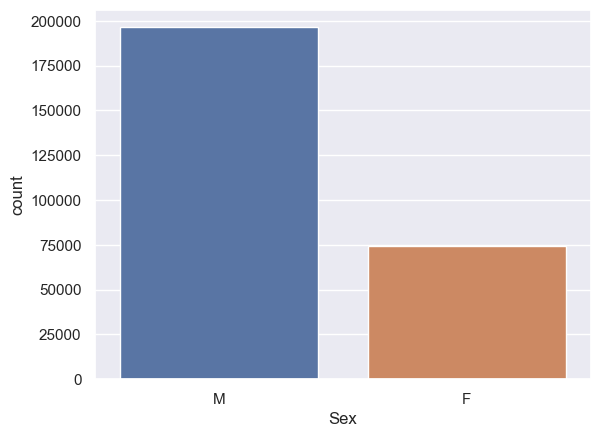

In [23]:
# Male and female participants.
sns.countplot(data=olympics_data,x='Sex')
plt.show()

In [24]:
olympics_data.head()

,NOC,region,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
1,CHN,China,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,CHN,China,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
3,DEN,Denmark,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
4,DEN,Denmark,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,NED,Netherlands,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None


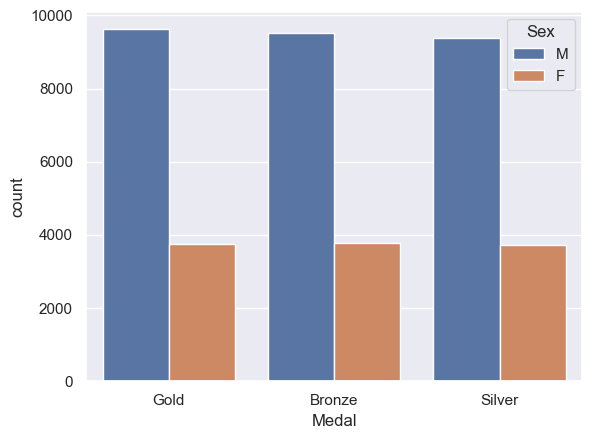

In [25]:
# How many won different types of medals (Gold,Silver,Bronze) ?
sns.countplot(data=olympics_data[olympics_data['Medal'] != 'None'],  x='Medal',hue='Sex')
plt.show()

In [26]:
# Which are the top 5 countries receiving most medals ?
medals_none_remove = olympics_data[olympics_data['Medal'] != 'None']
nationwise_medals = medals_none_remove[['region','Medal']]
nationwise_medals['count'] = [1 for i in range(nationwise_medals.shape[0])]
nationwise_medals

C:\Users\DELL\AppData\Local\Temp\ipykernel_6024\1043272260.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nationwise_medals['count'] = [1 for i in range(nationwise_medals.shape[0])]


,region,Medal,count
4,Denmark,Gold,1
39,Finland,Bronze,1
40,Finland,Bronze,1
41,Finland,Bronze,1
42,Finland,Gold,1
...,...,...,...
270730,Russia,Silver,1
270732,Russia,Gold,1
270735,Poland,Bronze,1
270754,Russia,Bronze,1


In [27]:
g = nationwise_medals.groupby(['region','Medal']).count()
g=g.sort_values(by=['count'],ascending=False)
g

count
region      Medal        
USA         Gold     2638
            Silver   1641
Russia      Gold     1599
USA         Bronze   1358
Germany     Gold     1301
...                   ...
Tonga       Silver      1
Ecuador     Gold        1
Senegal     Silver      1
Ivory Coast Silver      1
Peru        Gold        1

[327 rows x 1 columns]

In [28]:
g['Country'] = [k[0] for k in g.index]
g['Medl_type'] = [k[1] for k in g.index]

In [29]:
g.index = [i for i in range(g.shape[0])]

In [30]:
g = g[['Country','Medl_type','count']]
g.index=[i for i in range(1,g.shape[0]+1)]
g.head()

,Country,Medl_type,count
1,USA,Gold,2638
2,USA,Silver,1641
3,Russia,Gold,1599
4,USA,Bronze,1358
5,Germany,Gold,1301


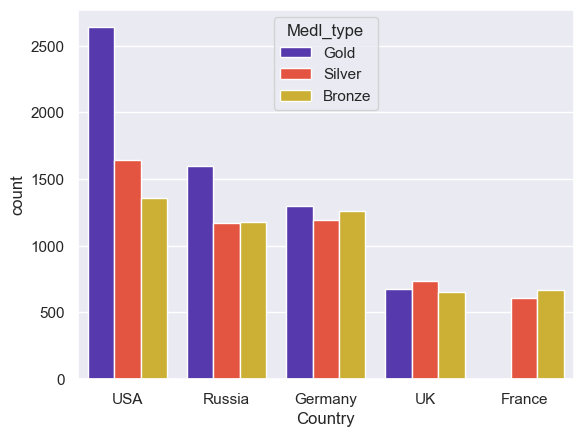

In [31]:
sns.barplot(data=g.head(14),x='Country',y='count',hue='Medl_type',palette='CMRmap')
plt.show()

In [32]:
# Which year noticed highest participations and lowest participations of countries ?
olympics_data.head()

,NOC,region,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
1,CHN,China,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,CHN,China,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
3,DEN,Denmark,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
4,DEN,Denmark,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,NED,Netherlands,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None


In [33]:
p = olympics_data[['Year','region']]
p

,Year,region
1,1992,China
2,2012,China
3,1920,Denmark
4,1900,Denmark
5,1992,Netherlands
...,...,...
270763,1976,Poland
270764,2014,Poland
270765,2014,Poland
270766,2002,Poland


In [34]:
p=p.groupby(['Year']).nunique()
p['Game-Year']=p.index
p.index=[i for i in range(1,p.shape[0]+1)]
p = p[['Game-Year','region']]
p.rename(columns={'region':'Country-Counts'},inplace=True)
p

,Game-Year,Country-Counts
1,1896,12
2,1900,31
3,1904,14
4,1906,20
5,1908,22
6,1912,28
7,1920,29
8,1924,46
9,1928,46
10,1932,47


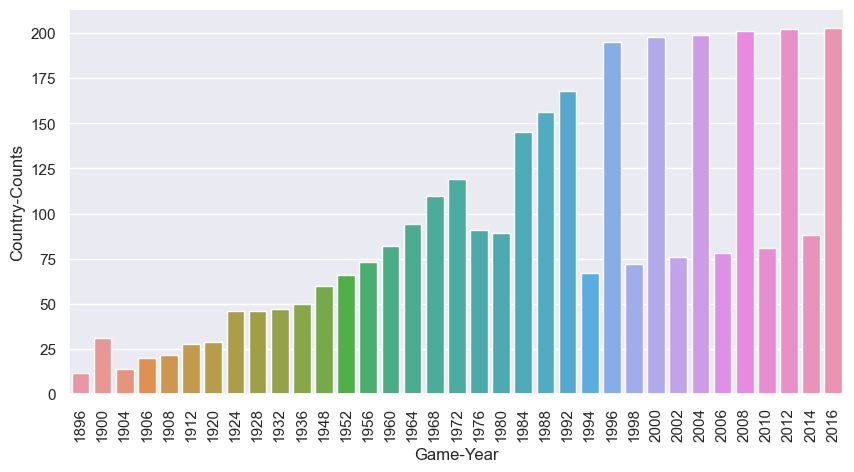

In [35]:
fig,ax = plt.subplots(figsize=(10,5))
chart=sns.barplot(data=p,x='Game-Year',y='Country-Counts',ax=ax)
chart.set_xticklabels(labels=list(p['Game-Year']),rotation=90)
plt.show()

In [36]:
# Find the maximum and minimum participations of the countries year wise.
p['Change-In-Participations']=p['Country-Counts'].diff()
p['%age-Change']=p['Country-Counts'].pct_change()
p=p.fillna(0)
p.round({'%age-Change':2})

,Game-Year,Country-Counts,Change-In-Participations,%age-Change
1,1896,12,0.0,0.00
2,1900,31,19.0,1.58
3,1904,14,-17.0,-0.55
4,1906,20,6.0,0.43
5,1908,22,2.0,0.10
6,1912,28,6.0,0.27
7,1920,29,1.0,0.04
8,1924,46,17.0,0.59
9,1928,46,0.0,0.00
10,1932,47,1.0,0.02


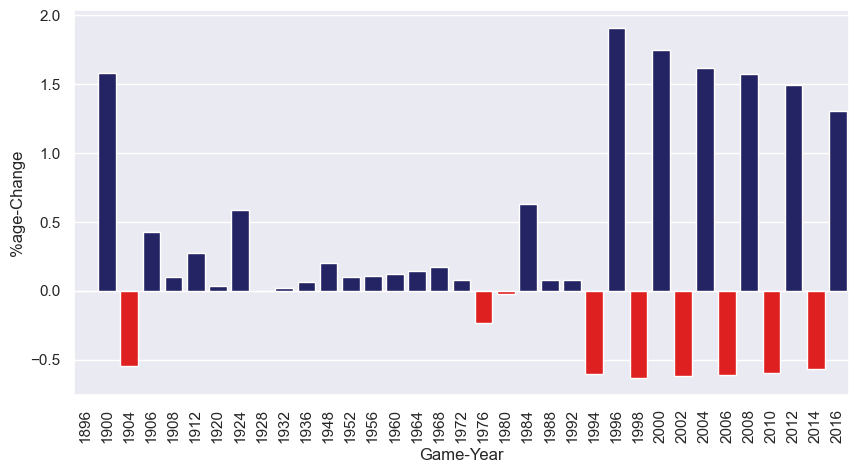

In [37]:
# Finding the percentage drop or rise in country participations.
fig,ax = plt.subplots(figsize=(10,5))
cols = ['red' if v < 0 else 'midnightblue' for v in p['%age-Change']]
chart=sns.barplot(data=p,x='Game-Year',y='%age-Change',ax=ax,palette=cols)
chart.set_xticklabels(labels=list(p['Game-Year']),rotation=90)
plt.show()

In [38]:
olympics_data.head()

,NOC,region,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
1,CHN,China,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,CHN,China,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
3,DEN,Denmark,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
4,DEN,Denmark,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,NED,Netherlands,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None


In [39]:
players = olympics_data[['Name','Medal']]
players = players[players['Medal'] != 'None']
players.head()

,Name,Medal
4,Edgar Lindenau Aabye,Gold
39,Arvo Ossian Aaltonen,Bronze
40,Arvo Ossian Aaltonen,Bronze
41,Juhamatti Tapio Aaltonen,Bronze
42,Paavo Johannes Aaltonen,Gold


In [40]:
players['count'] = [1 for i in range(players.shape[0])]
players.head()

,Name,Medal,count
4,Edgar Lindenau Aabye,Gold,1
39,Arvo Ossian Aaltonen,Bronze,1
40,Arvo Ossian Aaltonen,Bronze,1
41,Juhamatti Tapio Aaltonen,Bronze,1
42,Paavo Johannes Aaltonen,Gold,1


In [41]:
players = players.groupby(['Name','Medal']).sum()
players=players.sort_values(by=['count'],ascending=False)
players

count
Name                                 Medal        
Michael Fred Phelps, II              Gold       23
Raymond Clarence "Ray" Ewry          Gold       10
Larysa Semenivna Latynina (Diriy-)   Gold        9
Frederick Carlton "Carl" Lewis       Gold        9
Paavo Johannes Nurmi                 Gold        9
...                                            ...
Henri Antoine Padou, Sr.             Gold        1
                                     Bronze      1
Henri Andr Laperrire                 Gold        1
Henri Alphonse Hazebrouck (Charlet-) Gold        1
ystein Pettersen                     Gold        1

[33702 rows x 1 columns]

In [42]:
players['Name'] = [v[0] for v in players.index]
players['Medal'] = [v[1] for v in players.index]
players.index = [i for i in range(1,players.shape[0]+1)]
players.head()

,count,Name,Medal
1,23,"Michael Fred Phelps, II",Gold
2,10,"Raymond Clarence ""Ray"" Ewry",Gold
3,9,Larysa Semenivna Latynina (Diriy-),Gold
4,9,"Frederick Carlton ""Carl"" Lewis",Gold
5,9,Paavo Johannes Nurmi,Gold


In [43]:
top_ten_players = players[['Name','Medal','count']]
top_ten_players

,Name,Medal,count
1,"Michael Fred Phelps, II",Gold,23
2,"Raymond Clarence ""Ray"" Ewry",Gold,10
3,Larysa Semenivna Latynina (Diriy-),Gold,9
4,"Frederick Carlton ""Carl"" Lewis",Gold,9
5,Paavo Johannes Nurmi,Gold,9
...,...,...,...
33698,"Henri Antoine Padou, Sr.",Gold,1
33699,"Henri Antoine Padou, Sr.",Bronze,1
33700,Henri Andr Laperrire,Gold,1
33701,Henri Alphonse Hazebrouck (Charlet-),Gold,1


In [44]:
top_10 = top_ten_players.head(10)
top_10

,Name,Medal,count
1,"Michael Fred Phelps, II",Gold,23
2,"Raymond Clarence ""Ray"" Ewry",Gold,10
3,Larysa Semenivna Latynina (Diriy-),Gold,9
4,"Frederick Carlton ""Carl"" Lewis",Gold,9
5,Paavo Johannes Nurmi,Gold,9
6,Mark Andrew Spitz,Gold,9
7,Birgit Fischer-Schmidt,Gold,8
8,Ole Einar Bjrndalen,Gold,8
9,"Matthew Nicholas ""Matt"" Biondi",Gold,8
10,Usain St. Leo Bolt,Gold,8


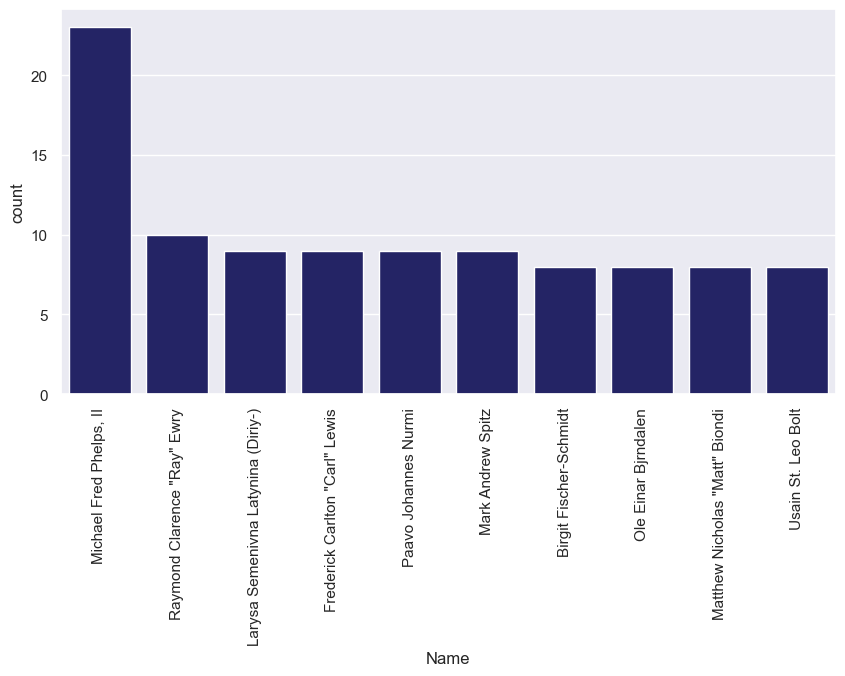

In [45]:
# Top 10 players receiving Gold Medals.
fig,ax = plt.subplots(figsize=(10,5))
chart=sns.barplot(data=top_10,x='Name',y='count',ax=ax,color='midnightblue')
chart.set_xticklabels(labels=list(top_10['Name']),rotation=90)
plt.show()

In [47]:
olympics_data.head()

,NOC,region,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
1,CHN,China,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,CHN,China,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
3,DEN,Denmark,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
4,DEN,Denmark,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,NED,Netherlands,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None


In [49]:
# Which age groups recieved maximum gold medals?
gold_medalists_data = olympics_data[(olympics_data.Medal == 'Gold')&(olympics_data.Age != 0.0)]
gold_medalists_data.head()

,NOC,region,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
4,DEN,Denmark,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,FIN,Finland,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
52,FIN,Finland,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
57,FIN,Finland,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
62,NOR,Norway,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold


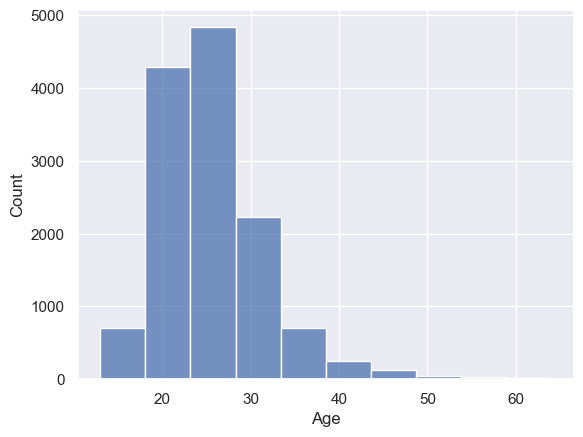

In [51]:
sns.histplot(data=gold_medalists_data,x='Age', bins=10)
plt.show()